# Analysis and Evaluation of Classification Models

This notebook aims to explore and compare the performance of different machine learning models for a classification problem. The main objectives are:

1.  **Evaluate baseline models:** Analyze the performance of classifiers such as **Logistic Regression**, **Random Forest**, and **XGBoost** using the entire feature set.
2.  **Perform feature selection:** Identify and use the 10 most relevant features to retrain the models, with the goal of improving efficiency and performance.
3.  **Optimize parameters:** Find the best hyperparameters for each model using optimization techniques.
4.  **Build and evaluate an ensemble:** Combine the optimized models into a **VotingClassifier** to leverage the collective strength of different algorithms and achieve more robust results.

Each section of the notebook is dedicated to a specific model, with charts and reports that document the different evaluation phases.

## 1) Setup and initialization

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%load_ext autoreload
%autoreload 2

from embeddings import EmbeddingBuilder
import os
import ipynbname
from scipy.stats import randint

from retrieval import ImageRetrieval
from sklearn.ensemble import VotingClassifier
from classifier import Classifier
import file_manager
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform

project_dir = f"{os.getcwd().split('SIDS_revelation_project')[0]}SIDS_revelation_project/"
image_dataset_path = f"{project_dir}datasets/onback_onstomach_v3"
model_path = f"{project_dir}/models/4.weights/best.pt"

In [3]:
emb_builder = EmbeddingBuilder(model_path, image_dataset_path, "load")
embeddings = emb_builder.embedding_all_features_norm()


Extracting dataset info from .coco.json file:---------------------------------------------
Dataset contains 4158 valid samples, and labels are {'baby_on_back': 1, 'baby_on_stomach': 2}
------------------------------------------------------------------------------------------

Loading features from .csv----------------------------------------------------------------
Features loaded succesfully, in particular there are 4158 files in the dataset
------------------------------------------------------------------------------------------

Embedding builder initialized successfully------------------------------------------------
Face detection model: 4 (YOLOv8)
Dataset: /Users/lorenzodimaio/Download/SIDS_revelation_project/datasets/onback_onstomach_v3
Dataset dimension: 4158
Dataset labels: {'baby_safe': 0, 'baby_unsafe': 1}
------------------------------------------------------------------------------------------

Creation of all features embedding-------------------------------------------

In [4]:
clf = Classifier(embeddings, emb_builder.y, emb_builder.classes_bs)

# 2) Logistic Regression

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


/opt/anaconda3/envs/yolov8_env/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/anaconda3/envs/yolov8_env/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/anaconda3/envs/yolov8_env/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this pack

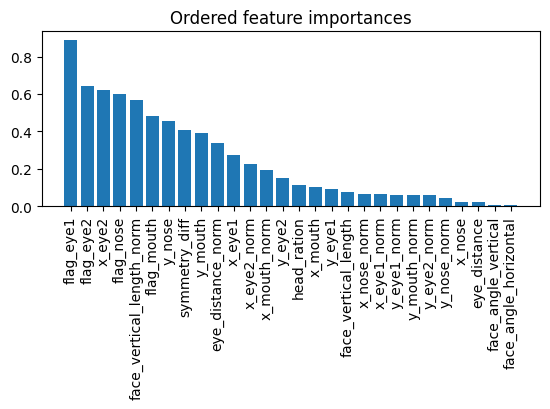

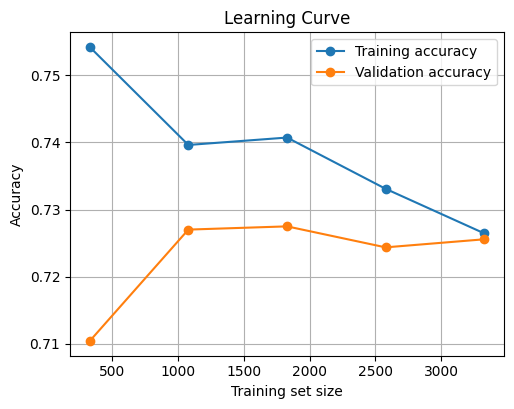


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.76      0.65      0.70       426
 baby_unsafe       0.68      0.79      0.73       406

    accuracy                           0.72       832
   macro avg       0.72      0.72      0.72       832
weighted avg       0.72      0.72      0.72       832

Confusion matrix---------------------------------------


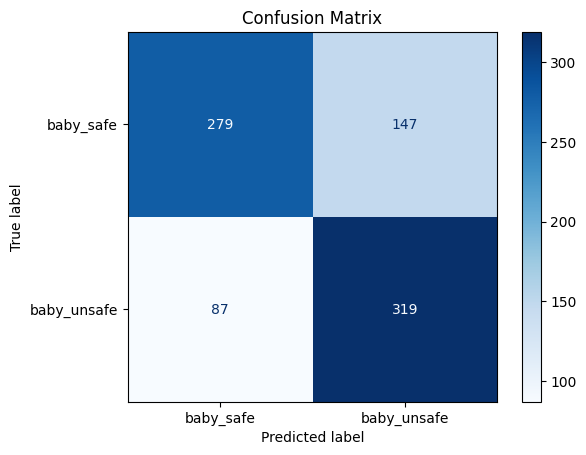

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


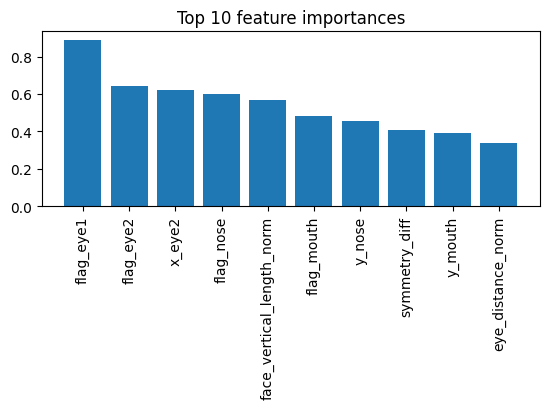

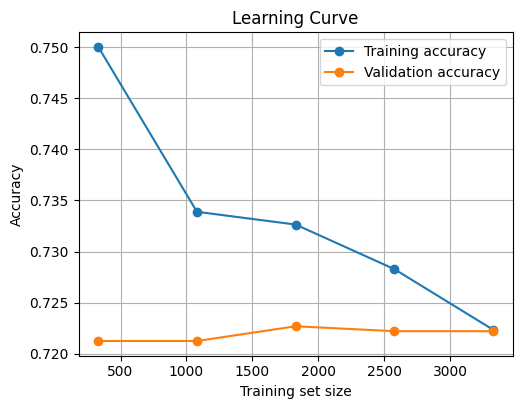


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.77      0.64      0.70       426
 baby_unsafe       0.68      0.79      0.73       406

    accuracy                           0.72       832
   macro avg       0.72      0.72      0.72       832
weighted avg       0.72      0.72      0.72       832

Confusion matrix---------------------------------------


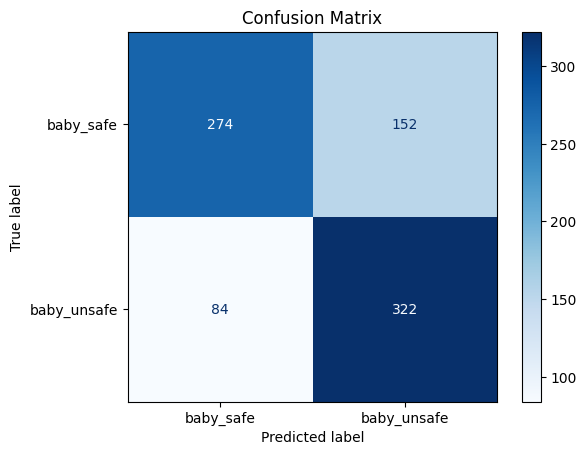

In [5]:
lr_1, results_lr_1 = clf.logistic_regression(verbose=True)


Start random search...

Random Search Results:
Best parameters found:  {'C': np.float64(530.0369711220895), 'l1_ratio': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best mean cross-validation accuracy:  0.7495472916525548
------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


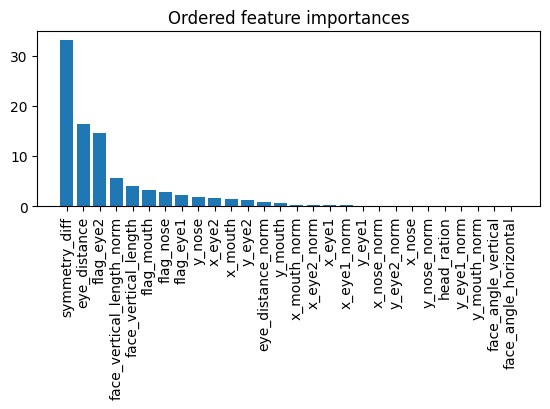

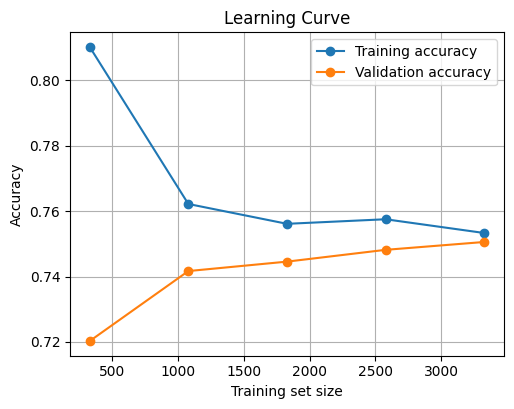


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.82      0.65      0.72       426
 baby_unsafe       0.70      0.84      0.76       406

    accuracy                           0.75       832
   macro avg       0.76      0.75      0.74       832
weighted avg       0.76      0.75      0.74       832

Confusion matrix---------------------------------------


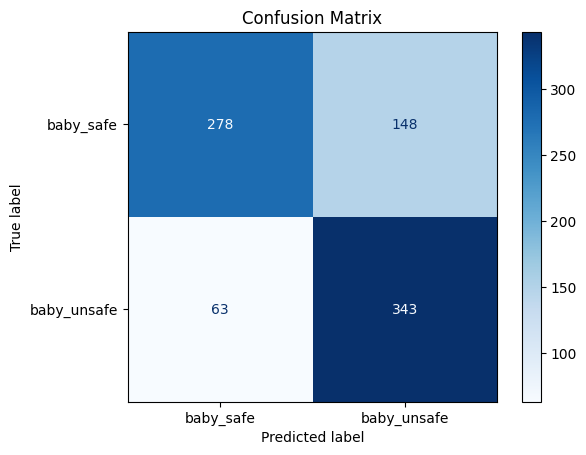

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


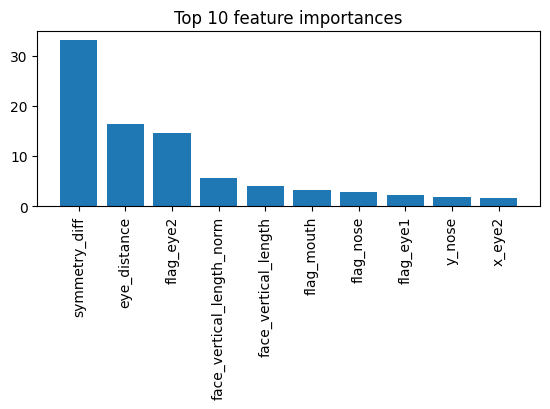

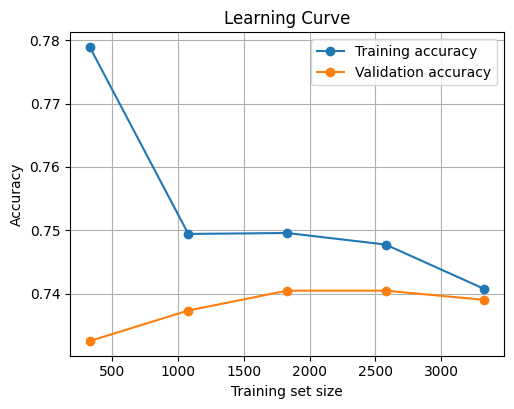


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.80      0.64      0.71       426
 baby_unsafe       0.69      0.83      0.75       406

    accuracy                           0.73       832
   macro avg       0.74      0.74      0.73       832
weighted avg       0.75      0.73      0.73       832

Confusion matrix---------------------------------------


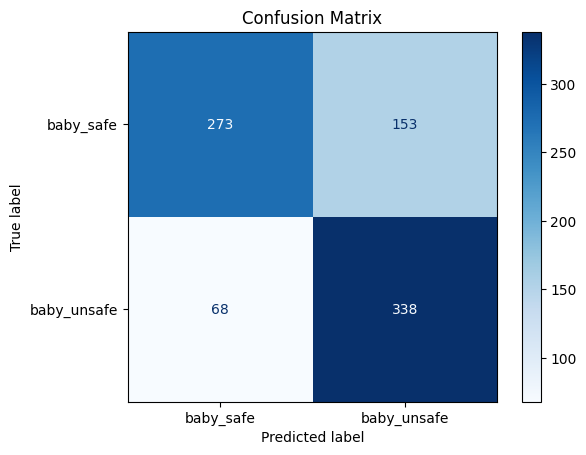

In [6]:
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': loguniform(0.001, 1000),
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga'],
    'l1_ratio': [0.1, 0.5, 0.9] # Usato solo con penalty='elasticnet'
}

best_params = clf.optimize_model(lr_1, param_grid,verbose=False)
lr_2 = LogisticRegression(**best_params)
results_lr_2 = clf.evaluation_pipeline(lr_2,verbose=True)

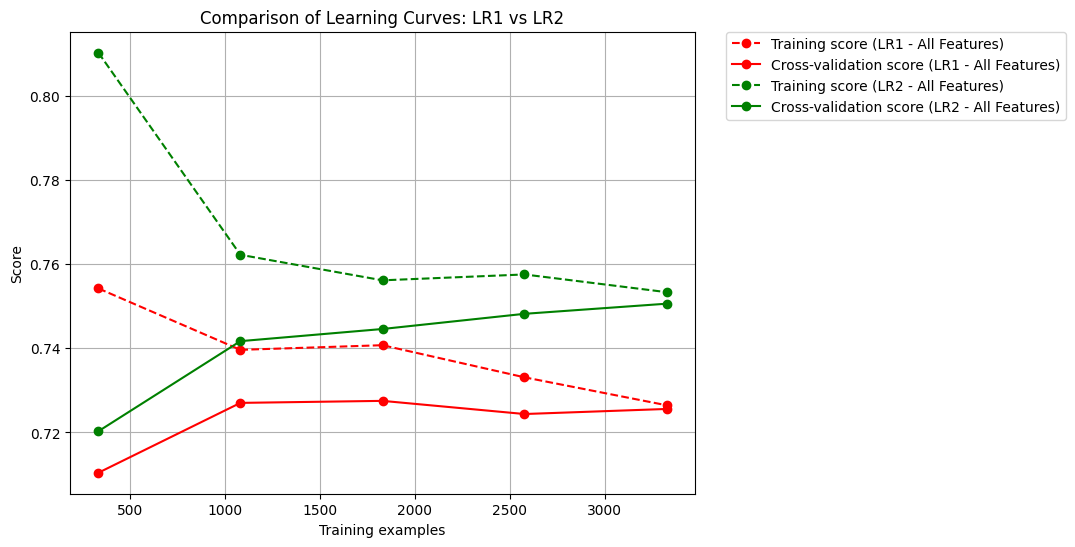

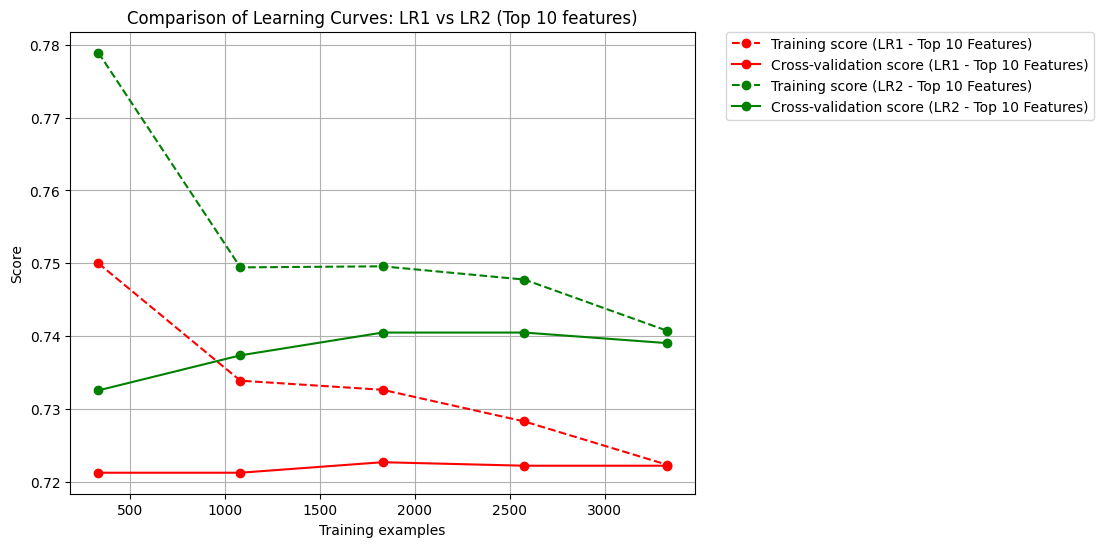

In [7]:
# Graph 1:
data_to_plot_1 = [
    (results_lr_1['all_features']['model'], "LR1 - All Features", results_lr_1['all_features']['X'], results_lr_1['all_features']['y']),
    (results_lr_2['all_features']['model'], "LR2 - All Features", results_lr_2['all_features']['X'], results_lr_2['all_features']['y'])
]

clf.plot_learning_curve_comparison(
    data_sets=data_to_plot_1,
    title="Comparison of Learning Curves: LR1 vs LR2"
)

# Graph 2:
data_to_plot_2 = [
    (results_lr_1['top_10_features']['model'], "LR1 - Top 10 Features", results_lr_1['top_10_features']['X'], results_lr_1['top_10_features']['y']),
    (results_lr_2['top_10_features']['model'], "LR2 - Top 10 Features", results_lr_2['top_10_features']['X'], results_lr_2['top_10_features']['y'])
]

clf.plot_learning_curve_comparison(
    data_sets=data_to_plot_2,
    title="Comparison of Learning Curves: LR1 vs LR2 (Top 10 features)"
)

# 3) Random Forest


------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


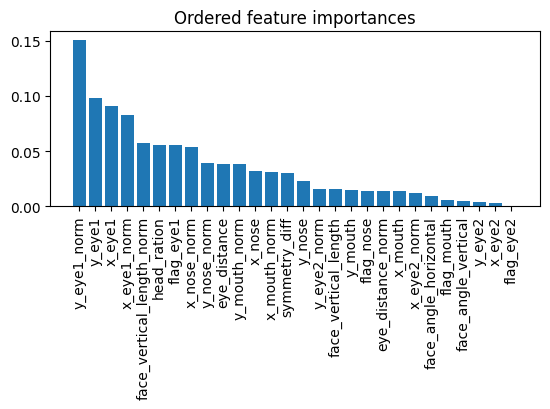

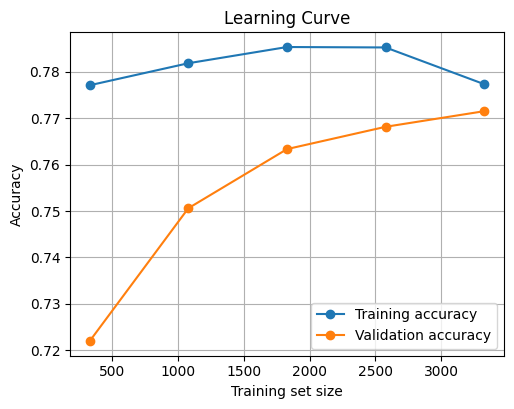


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.83      0.67      0.74       426
 baby_unsafe       0.71      0.85      0.78       406

    accuracy                           0.76       832
   macro avg       0.77      0.76      0.76       832
weighted avg       0.77      0.76      0.76       832

Confusion matrix---------------------------------------


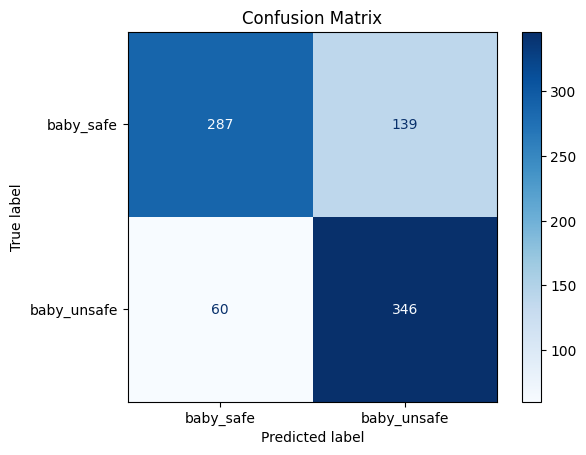

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


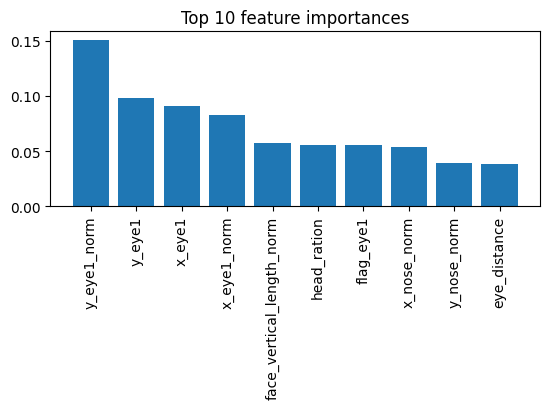

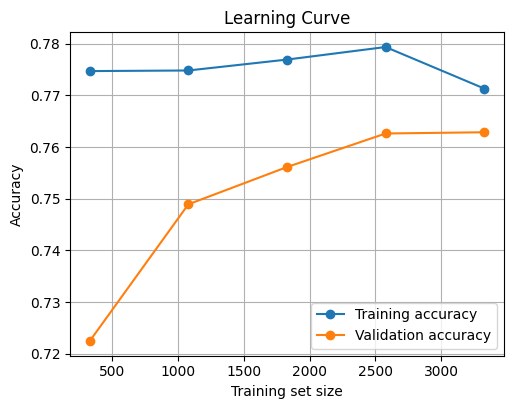


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.83      0.66      0.73       426
 baby_unsafe       0.71      0.86      0.77       406

    accuracy                           0.76       832
   macro avg       0.77      0.76      0.75       832
weighted avg       0.77      0.76      0.75       832

Confusion matrix---------------------------------------


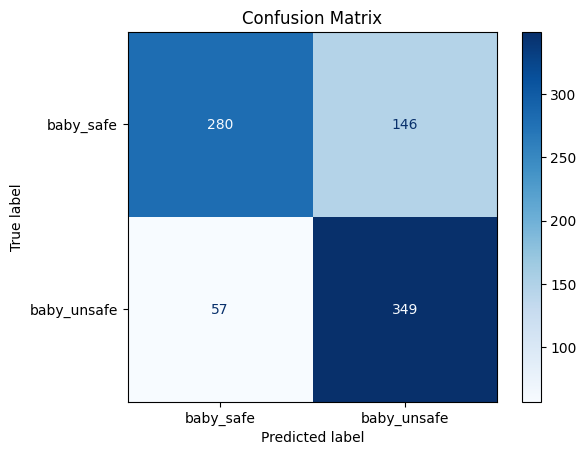

In [8]:
random_forest_1, results_rf1 = clf.random_forest(verbose=True)


Start random search...

Random Search Results:
Best parameters found:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 17, 'max_features': 0.5, 'max_samples': np.float64(0.8473924665198522), 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 995}
Best mean cross-validation accuracy:  0.8496696696696697
------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


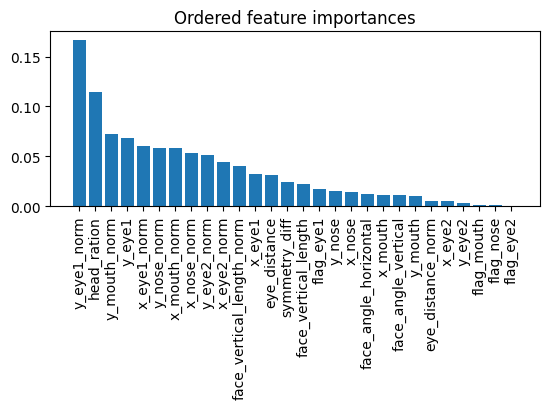

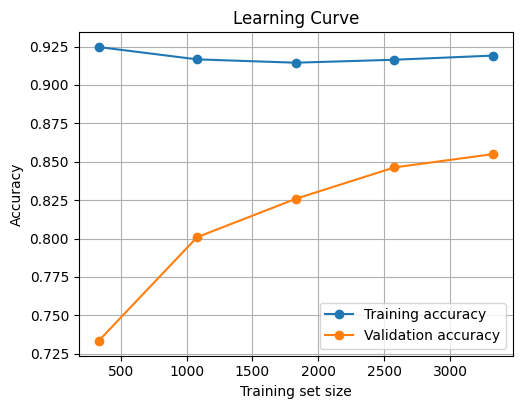


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.89      0.78      0.83       426
 baby_unsafe       0.80      0.90      0.85       406

    accuracy                           0.84       832
   macro avg       0.85      0.84      0.84       832
weighted avg       0.85      0.84      0.84       832

Confusion matrix---------------------------------------


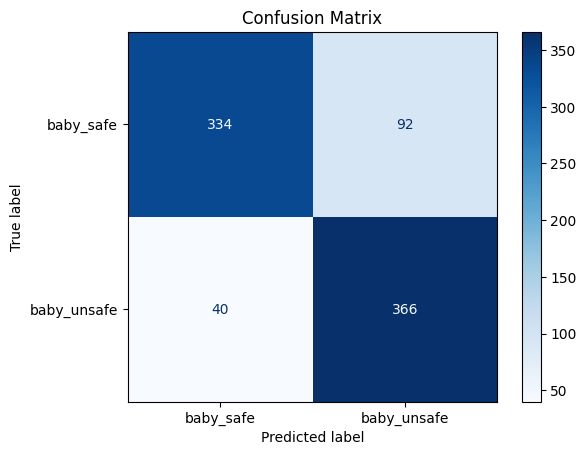

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


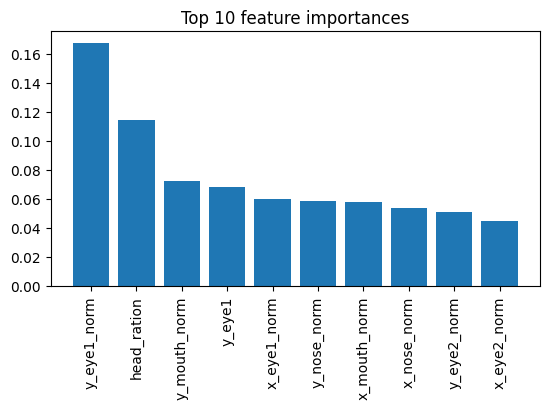

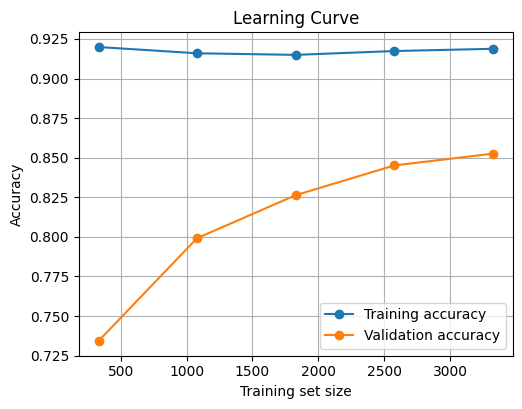


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.88      0.78      0.82       426
 baby_unsafe       0.79      0.88      0.83       406

    accuracy                           0.83       832
   macro avg       0.83      0.83      0.83       832
weighted avg       0.83      0.83      0.83       832

Confusion matrix---------------------------------------


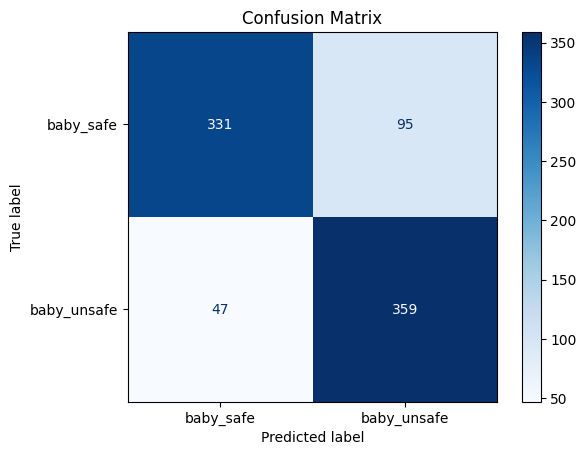

In [9]:
param_dist = {
        'n_estimators': randint(200, 1000), # Random number between 100 and 500
        'max_depth': randint(5, 50),     # Random number between 5 and 20
        'min_samples_split': randint(2, 40),
        'min_samples_leaf': randint(1, 25),
        'max_features': ['sqrt', 'log2', 0.5, 0.7, 0.9, None],
        'criterion': ['gini', 'entropy'],
        'max_samples': uniform(0.5, 0.5),
        'bootstrap': [True, False]
}

best_params = clf.optimize_model(random_forest_1, param_dist,verbose=False)
random_forest_2 = RandomForestClassifier(**best_params)
results_rf2 = clf.evaluation_pipeline(random_forest_2,verbose=True)

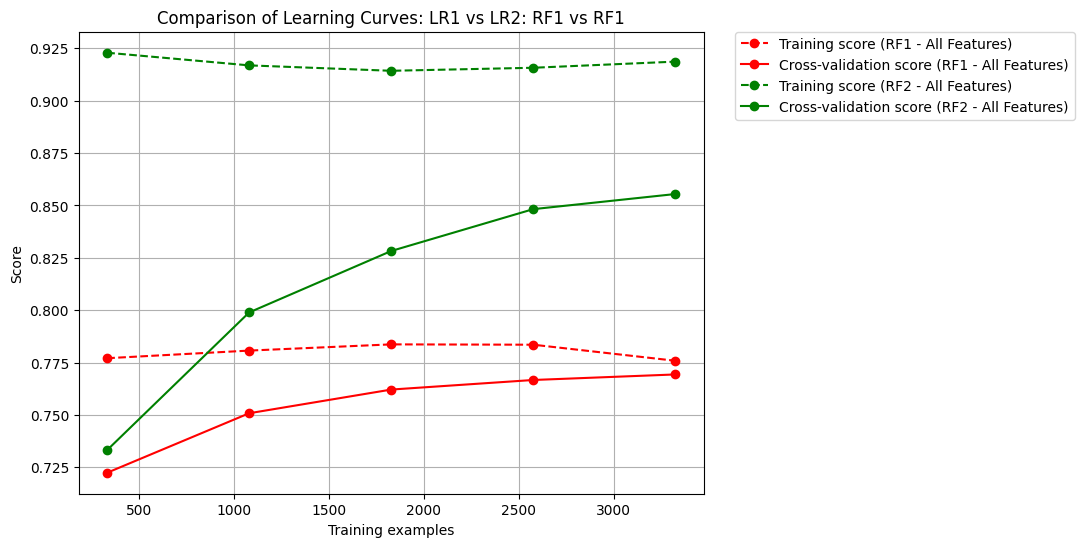

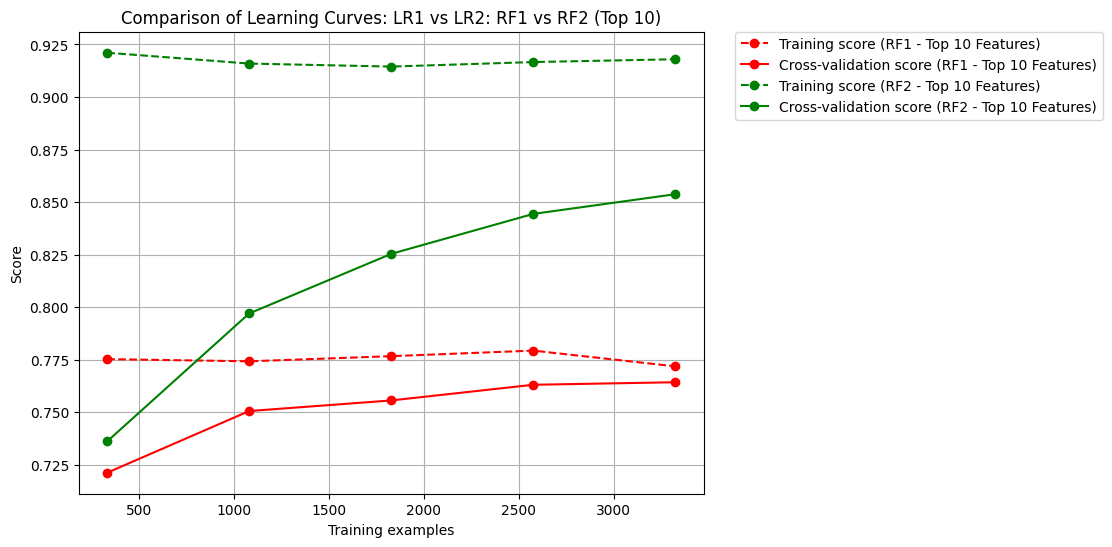

In [10]:
# Graph 1:
data_to_plot_1 = [
    (results_rf1['all_features']['model'], "RF1 - All Features", results_rf1['all_features']['X'], results_rf1['all_features']['y']),
    (results_rf2['all_features']['model'], "RF2 - All Features", results_rf2['all_features']['X'], results_rf2['all_features']['y'])
]

clf.plot_learning_curve_comparison(
    data_sets=data_to_plot_1,
    title="Comparison of Learning Curves: LR1 vs LR2: RF1 vs RF1"
)

# Graph 2:
data_to_plot_2 = [
    (results_rf1['top_10_features']['model'], "RF1 - Top 10 Features", results_rf1['top_10_features']['X'], results_rf1['top_10_features']['y']),
    (results_rf2['top_10_features']['model'], "RF2 - Top 10 Features", results_rf2['top_10_features']['X'], results_rf2['top_10_features']['y'])
]

clf.plot_learning_curve_comparison(
    data_sets=data_to_plot_2,
    title="Comparison of Learning Curves: LR1 vs LR2: RF1 vs RF2 (Top 10)"
)

# 4) XGBC

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


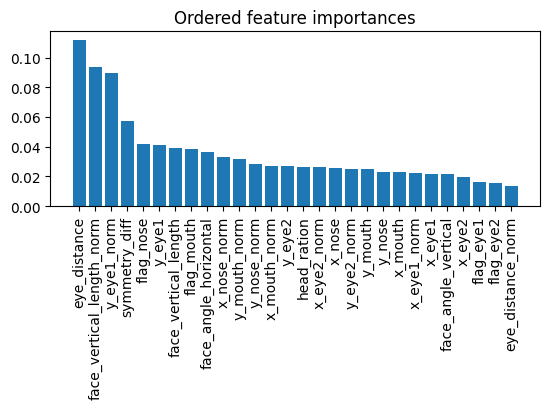

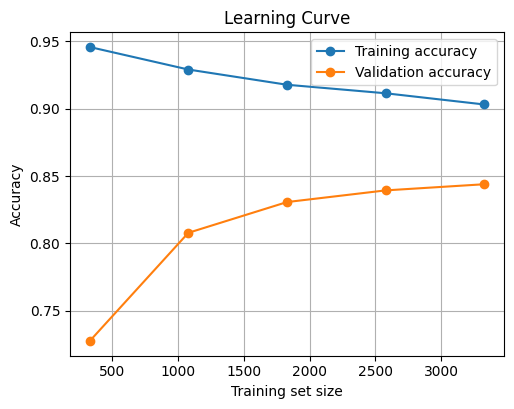


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.88      0.79      0.83       426
 baby_unsafe       0.80      0.89      0.84       406

    accuracy                           0.84       832
   macro avg       0.84      0.84      0.84       832
weighted avg       0.84      0.84      0.84       832

Confusion matrix---------------------------------------


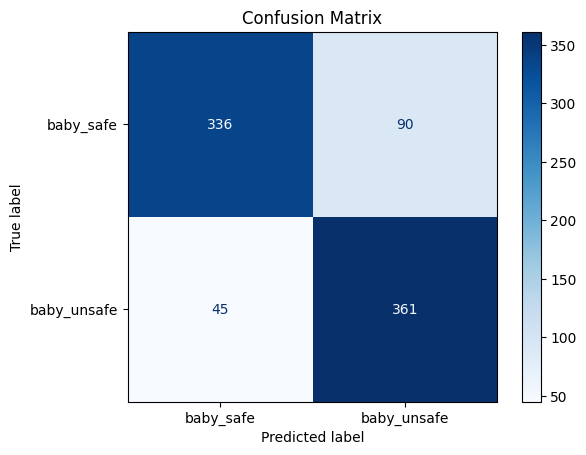

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


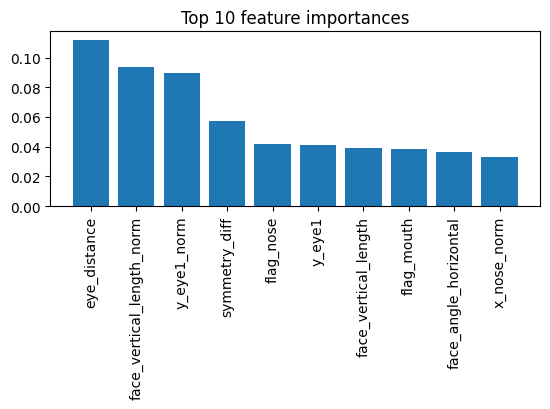

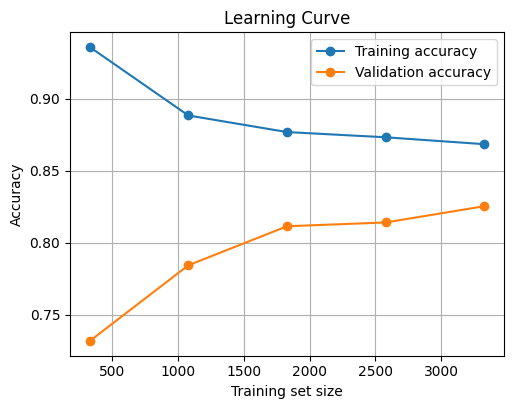


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.87      0.75      0.80       426
 baby_unsafe       0.77      0.88      0.82       406

    accuracy                           0.81       832
   macro avg       0.82      0.81      0.81       832
weighted avg       0.82      0.81      0.81       832

Confusion matrix---------------------------------------


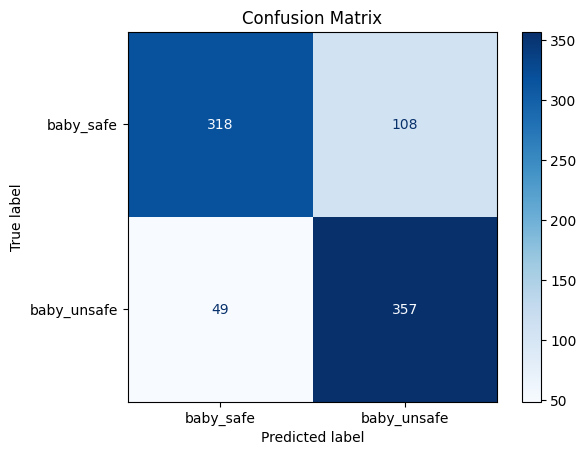

In [11]:
xgbc_1, results_xgbc_1 = clf.XGBC(verbose=True)


Start random search...

Random Search Results:
Best parameters found:  {'colsample_bytree': np.float64(0.618786386710022), 'gamma': np.float64(0.0831416843780397), 'learning_rate': np.float64(0.23141008492791112), 'max_depth': 5, 'n_estimators': 280, 'subsample': np.float64(0.8412608437865553)}
Best mean cross-validation accuracy:  0.8538783896678634
------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


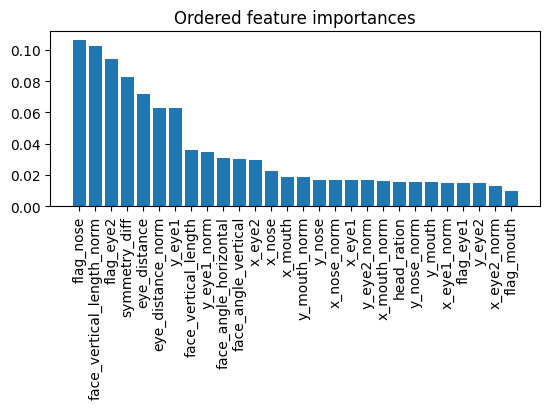

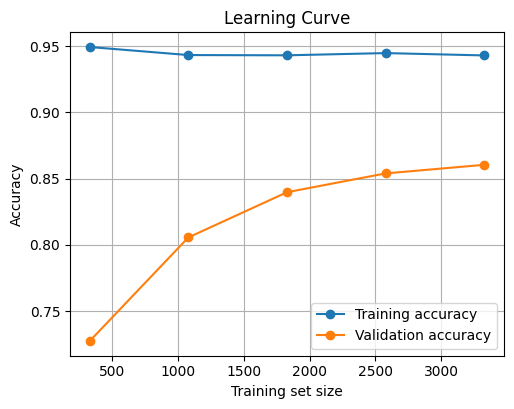


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.87      0.82      0.84       426
 baby_unsafe       0.82      0.87      0.84       406

    accuracy                           0.84       832
   macro avg       0.84      0.84      0.84       832
weighted avg       0.84      0.84      0.84       832

Confusion matrix---------------------------------------


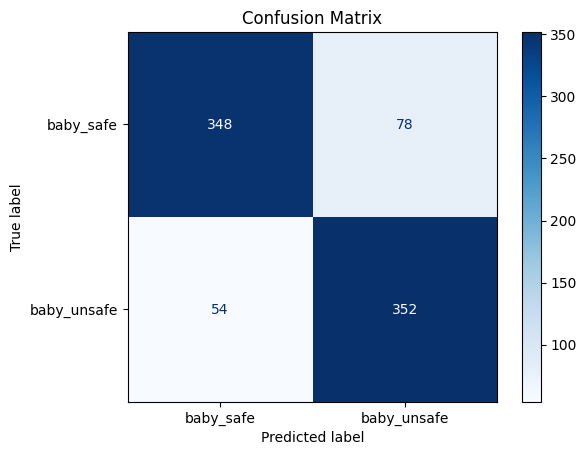

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


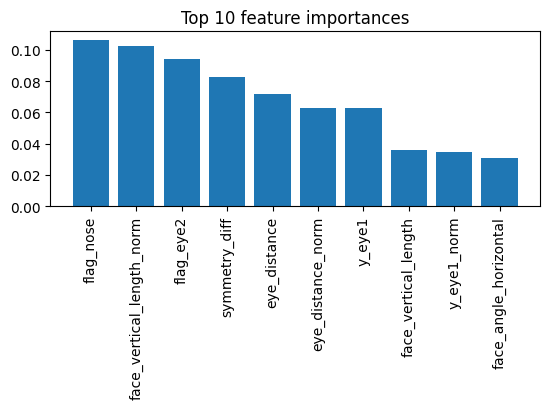

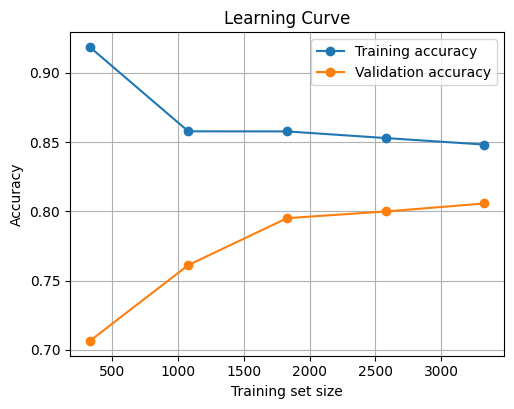


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.86      0.71      0.78       426
 baby_unsafe       0.74      0.88      0.81       406

    accuracy                           0.79       832
   macro avg       0.80      0.80      0.79       832
weighted avg       0.80      0.79      0.79       832

Confusion matrix---------------------------------------


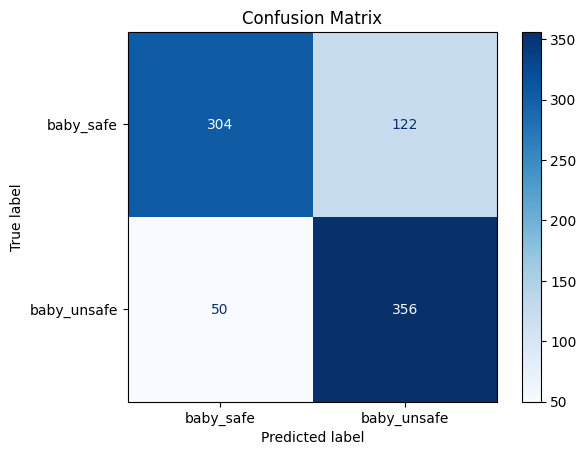

In [12]:
param_dist = {
    'n_estimators': randint(100, 500), # Numero di alberi da costruire
    'learning_rate': uniform(0.01, 0.3), # Passo di apprendimento
    'max_depth': randint(3, 10), # Profondità massima di un albero
    'subsample': uniform(0.6, 0.4), # Frazione di campioni da usare per l'addestramento
    'colsample_bytree': uniform(0.6, 0.4), # Frazione di feature da usare per la costruzione di ogni albero
    'gamma': uniform(0, 0.5) # Riduzione minima della perdita richiesta per fare un'ulteriore partizione
    }
best_params_xgbc = clf.optimize_model(xgbc_1, param_dist,verbose=False)
xgbc_2 = XGBClassifier(**best_params_xgbc)
results_xgbc_2 = clf.evaluation_pipeline(xgbc_2,verbose=True)

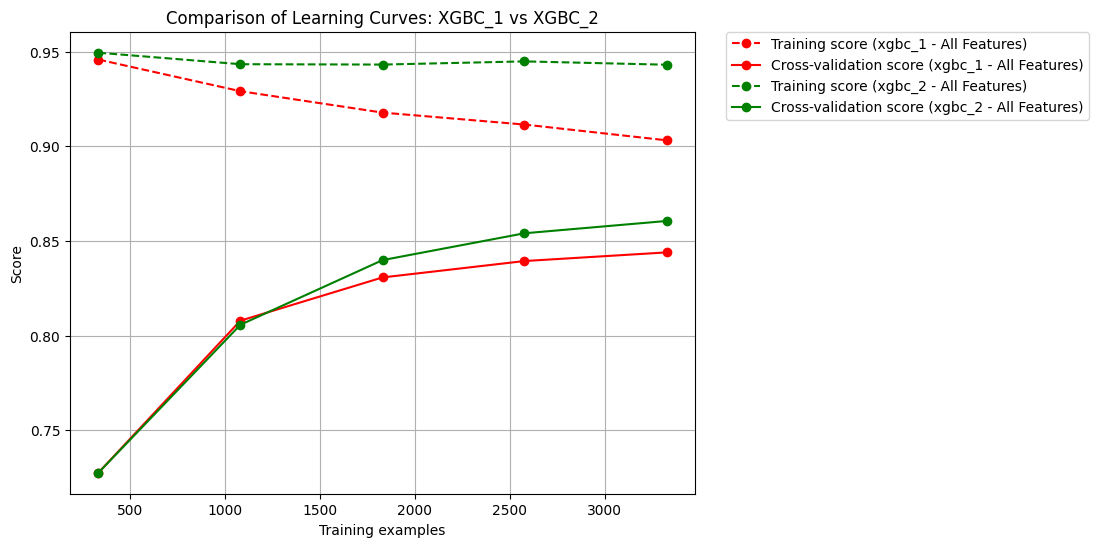

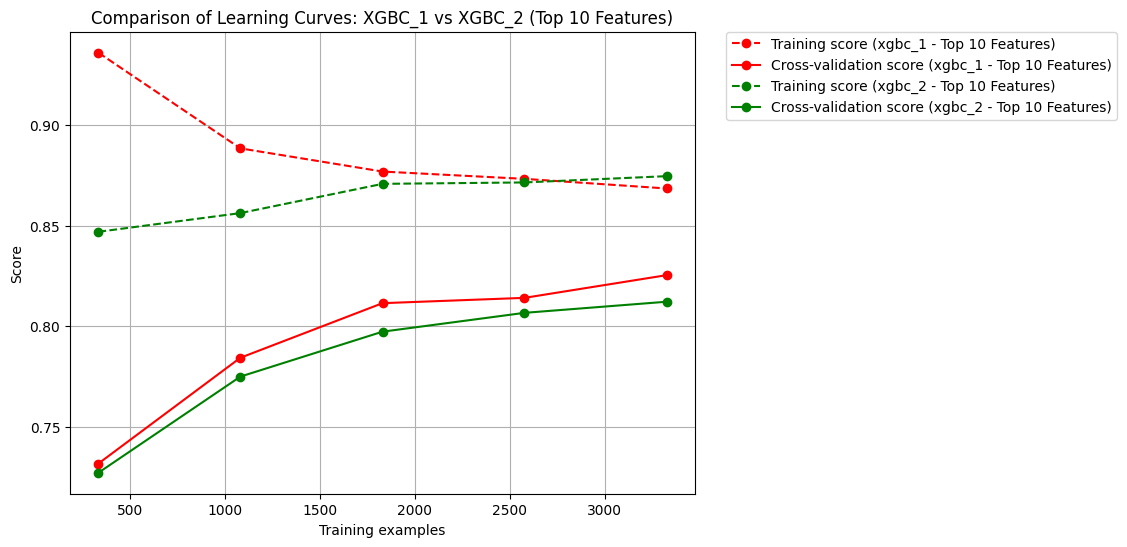

In [13]:
# Graph 1:
data_to_plot_1 = [
    (results_xgbc_1['all_features']['model'], "xgbc_1 - All Features", results_xgbc_1['all_features']['X'], results_xgbc_1['all_features']['y']),
    (results_xgbc_2['all_features']['model'], "xgbc_2 - All Features", results_xgbc_2['all_features']['X'], results_xgbc_2['all_features']['y'])
]

clf.plot_learning_curve_comparison(
    data_sets=data_to_plot_1,
    title="Comparison of Learning Curves: XGBC_1 vs XGBC_2"
)

# Graph 2:
data_to_plot_2 = [
    (results_xgbc_1['top_10_features']['model'], "xgbc_1 - Top 10 Features", results_xgbc_1['top_10_features']['X'], results_xgbc_1['top_10_features']['y']),
    (results_rf2['top_10_features']['model'], "xgbc_2 - Top 10 Features", results_xgbc_2['top_10_features']['X'], results_xgbc_2['top_10_features']['y'])
]

clf.plot_learning_curve_comparison(
    data_sets=data_to_plot_2,
    title="Comparison of Learning Curves: XGBC_1 vs XGBC_2 (Top 10 Features)"
)

# 5) Bagging

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


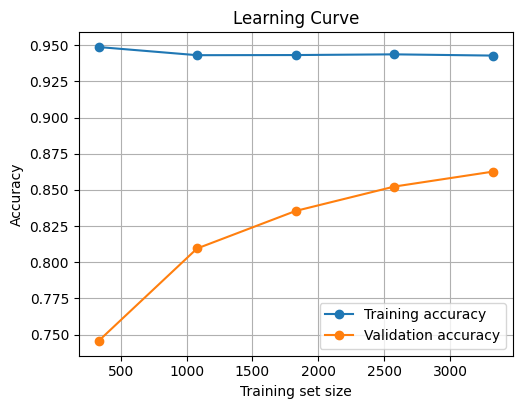


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.88      0.82      0.85       426
 baby_unsafe       0.82      0.88      0.85       406

    accuracy                           0.85       832
   macro avg       0.85      0.85      0.85       832
weighted avg       0.85      0.85      0.85       832

Confusion matrix---------------------------------------


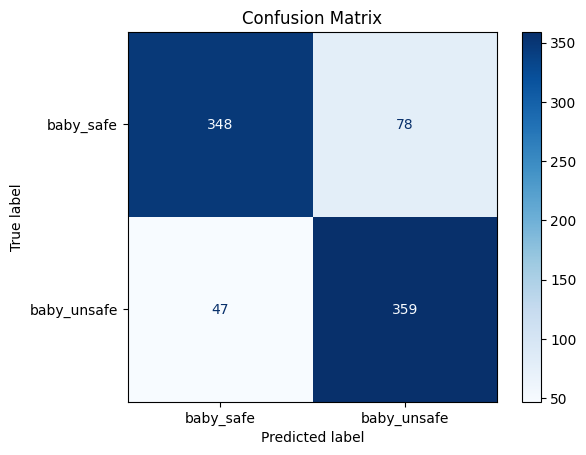

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
base_clf = DecisionTreeClassifier(random_state=42)
bagging_1, results_bag_1 = clf.bagging(base_clf=base_clf,verbose=True)


Start random search...

Random Search Results:
Best parameters found:  {'bootstrap_features': True, 'estimator__max_depth': 22, 'estimator__min_samples_split': 3, 'max_features': np.float64(0.7541636490697388), 'max_samples': np.float64(0.7952905884189387), 'n_estimators': 372}
Best mean cross-validation accuracy:  0.8541800447063604
------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


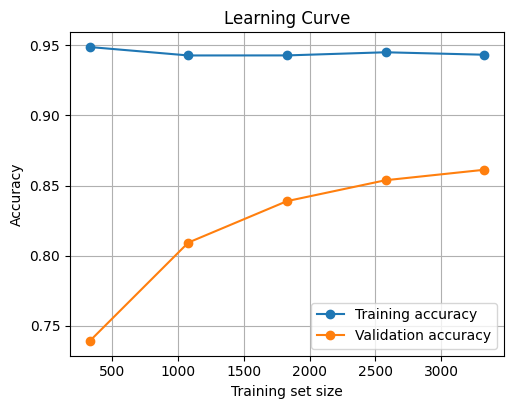


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.89      0.81      0.85       426
 baby_unsafe       0.82      0.89      0.86       406

    accuracy                           0.85       832
   macro avg       0.86      0.85      0.85       832
weighted avg       0.86      0.85      0.85       832

Confusion matrix---------------------------------------


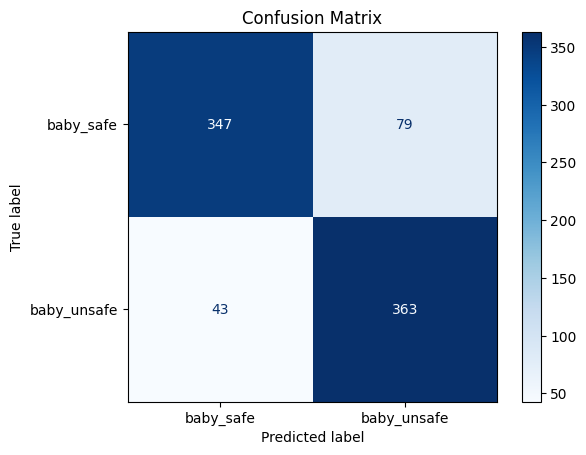

In [15]:
# Definisci il dizionario dei parametri per la ricerca casuale
param_grid = {
    'n_estimators': randint(100, 500),
    'max_samples': uniform(0.5, 1),
    'max_features': uniform(0.5, 1),
    'bootstrap_features': [True, False],
    'estimator__max_depth': randint(1,30),
    'estimator__min_samples_split': randint(2, 20)
}

best_params_bagging = clf.optimize_model(model=bagging_1, param_grid=param_grid, verbose=False)

dt_params = {
    'max_depth': best_params_bagging.pop('estimator__max_depth'),
    'min_samples_split': best_params_bagging.pop('estimator__min_samples_split')
}

bagging_2 = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42,**dt_params),
    **best_params_bagging)

results_bagging_2 = clf.evaluation_pipeline(bagging_2,verbose=True)

# 6) Ensamble

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


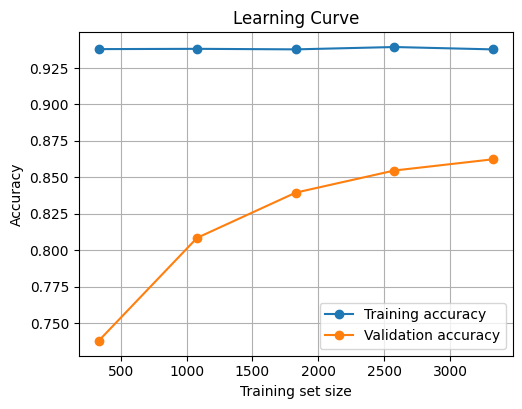


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.89      0.79      0.84       426
 baby_unsafe       0.80      0.89      0.85       406

    accuracy                           0.84       832
   macro avg       0.84      0.84      0.84       832
weighted avg       0.85      0.84      0.84       832

Confusion matrix---------------------------------------


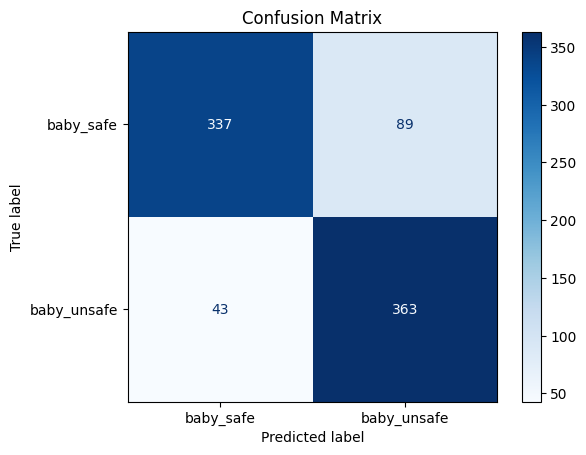

In [16]:
voting_clf_soft = VotingClassifier(
    estimators=[('lr', lr_2), ('rf', random_forest_2), ('xgb', xgbc_2), ('bagging', bagging_2)],
    voting='soft'  # 'hard' per la maggioranza, 'soft' per le probabilità
)

results_voting_soft = clf.evaluation_pipeline(voting_clf_soft,verbose=True,is_ensemble=True)

------------------------------------------------------------------------------------------
-----------------------ENSEMBLE MODEL EVALUATION ON TOP 10 FEATURES-----------------------
------------------------------------------------------------------------------------------


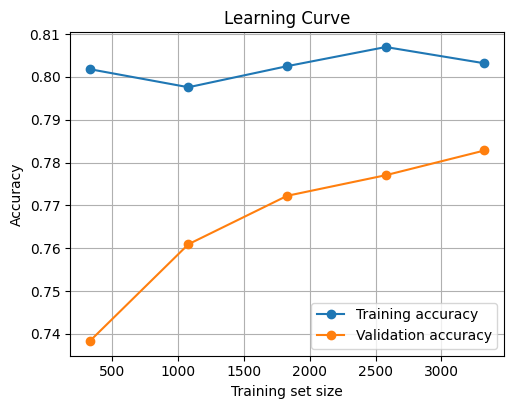


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.87      0.65      0.74       426
 baby_unsafe       0.71      0.90      0.79       406

    accuracy                           0.77       832
   macro avg       0.79      0.77      0.77       832
weighted avg       0.79      0.77      0.77       832

Confusion matrix---------------------------------------


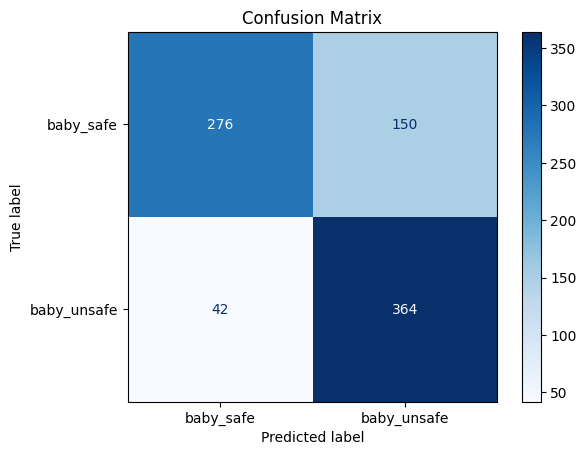

In [17]:
top_10_features_idx = results_lr_2['top_10_features']['top_features_idx']

results_voting_soft = clf.ensemble_on_top_features(
    ensemble_clf=voting_clf_soft,
    top_features_idx=top_10_features_idx,
    verbose=True
)

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


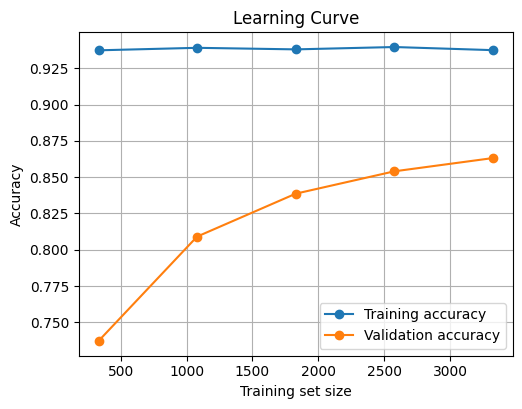


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.89      0.79      0.84       426
 baby_unsafe       0.80      0.90      0.85       406

    accuracy                           0.84       832
   macro avg       0.85      0.85      0.84       832
weighted avg       0.85      0.84      0.84       832

Confusion matrix---------------------------------------


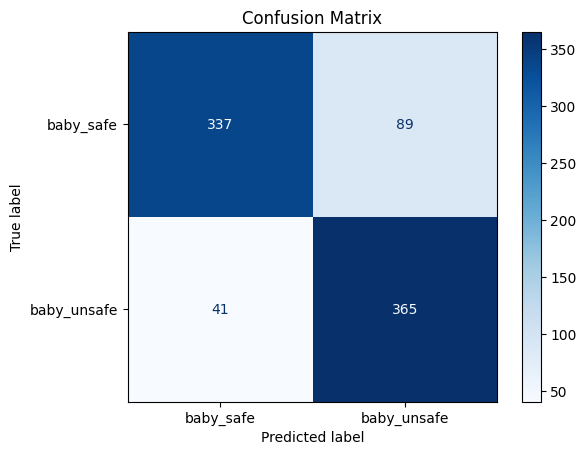

In [18]:
from sklearn.calibration import CalibratedClassifierCV
# Calibrazione dei modelli per migliorare le probabilità
# Per la Regressione Logistica, la calibrazione è solitamente meno necessaria, ma è una buona pratica
calibrated_lr = CalibratedClassifierCV(lr_2, method='isotonic', cv=5)

# Per il Random Forest e altri modelli basati su alberi, la calibrazione è molto utile
calibrated_rf = CalibratedClassifierCV(random_forest_2, method='isotonic', cv=5)

# Anche per XGBoost, la calibrazione può aiutare
calibrated_xgbc = CalibratedClassifierCV(xgbc_2, method='isotonic', cv=5)

calibrated_bagging = CalibratedClassifierCV(bagging_2, method='isotonic', cv=5)

# Creazione del VotingClassifier utilizzando i modelli calibrati
# Nota: La calibrazione richiede 'voting='soft' per funzionare correttamente
voting_clf_soft_calibrated = VotingClassifier(
    estimators=[
        ('lr_calibrated', calibrated_lr),
        ('rf_calibrated', calibrated_rf),
        ('xgbc_calibrated', calibrated_xgbc),
        ('bagging_calibrated', calibrated_bagging)
    ],
    voting='soft'
)
results_voting_soft_calibrated = clf.evaluation_pipeline(voting_clf_soft,verbose=True,is_ensemble=True)

------------------------------------------------------------------------------------------
-----------------------ENSEMBLE MODEL EVALUATION ON TOP 10 FEATURES-----------------------
------------------------------------------------------------------------------------------


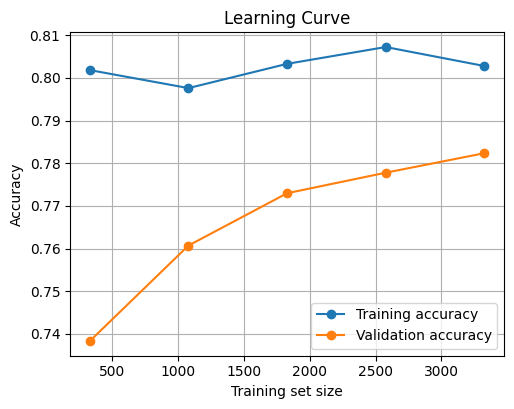


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.87      0.65      0.74       426
 baby_unsafe       0.71      0.90      0.79       406

    accuracy                           0.77       832
   macro avg       0.79      0.77      0.77       832
weighted avg       0.79      0.77      0.77       832

Confusion matrix---------------------------------------


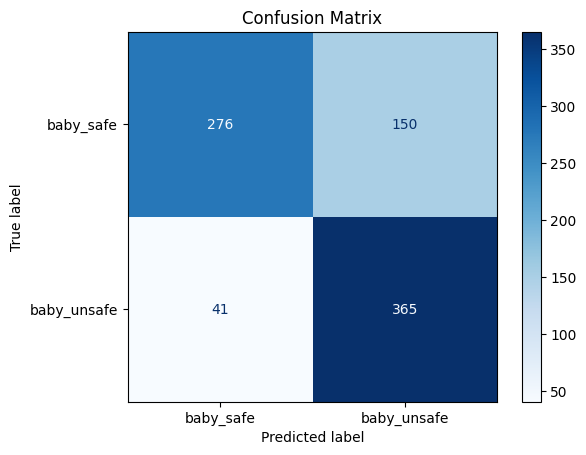

{'top_10_features': {'model': VotingClassifier(estimators=[('lr',
                                LogisticRegression(C=np.float64(530.0369711220895),
                                                   l1_ratio=0.1,
                                                   solver='liblinear')),
                               ('rf',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=17,
                                                       max_features=0.5,
                                                       max_samples=np.float64(0.8473924665198522),
                                                       min_samples_leaf=2,
                                                       min_samples_split=7,
                                                       n_estimators=995)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,...
            

In [19]:
top_10_features_idx = results_lr_2['top_10_features']['top_features_idx']

clf.ensemble_on_top_features(
    ensemble_clf=voting_clf_soft,
    top_features_idx=top_10_features_idx,
    verbose=True
)

# Compare all the models


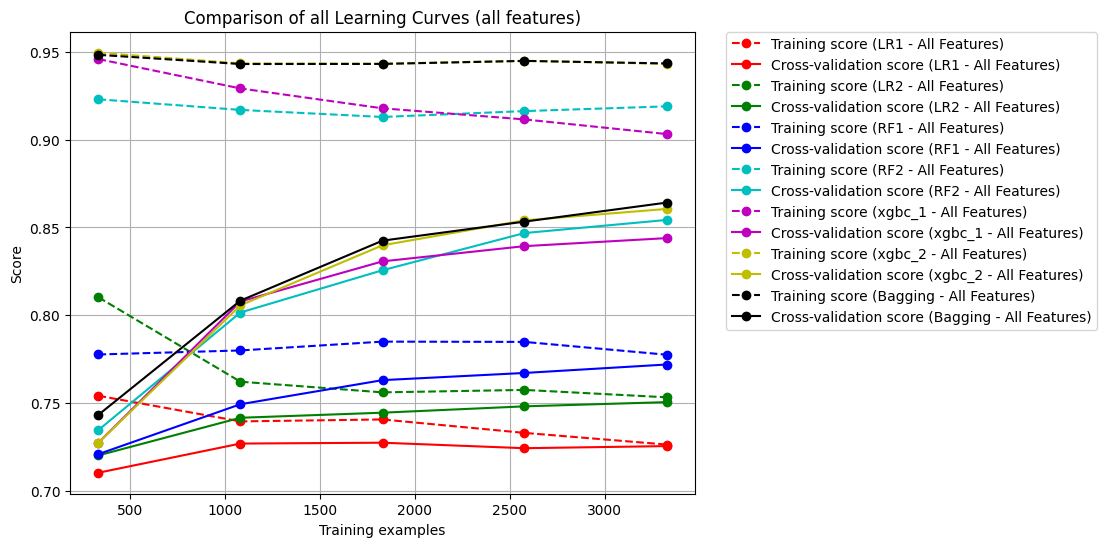

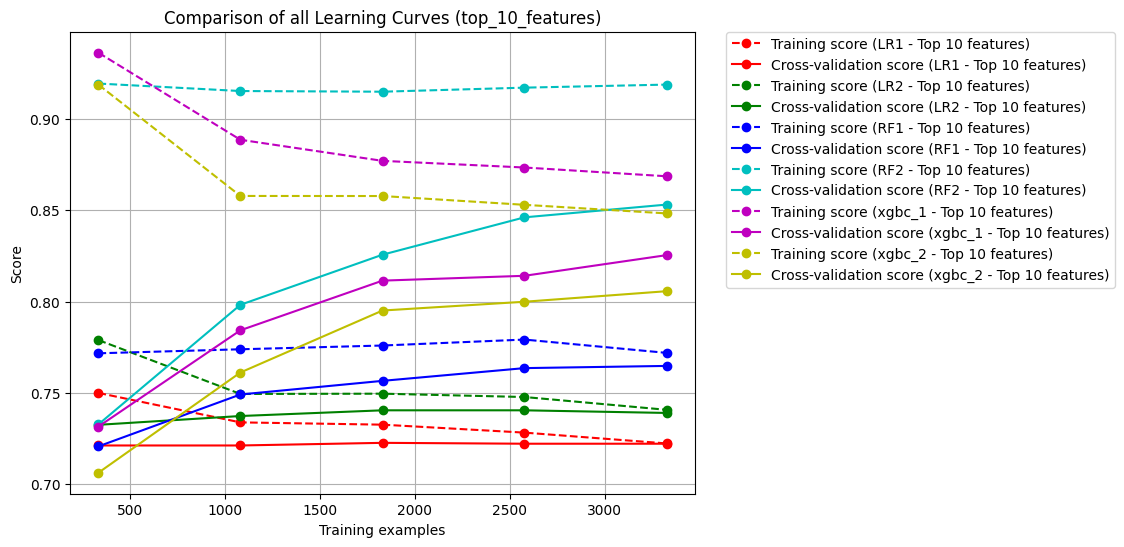

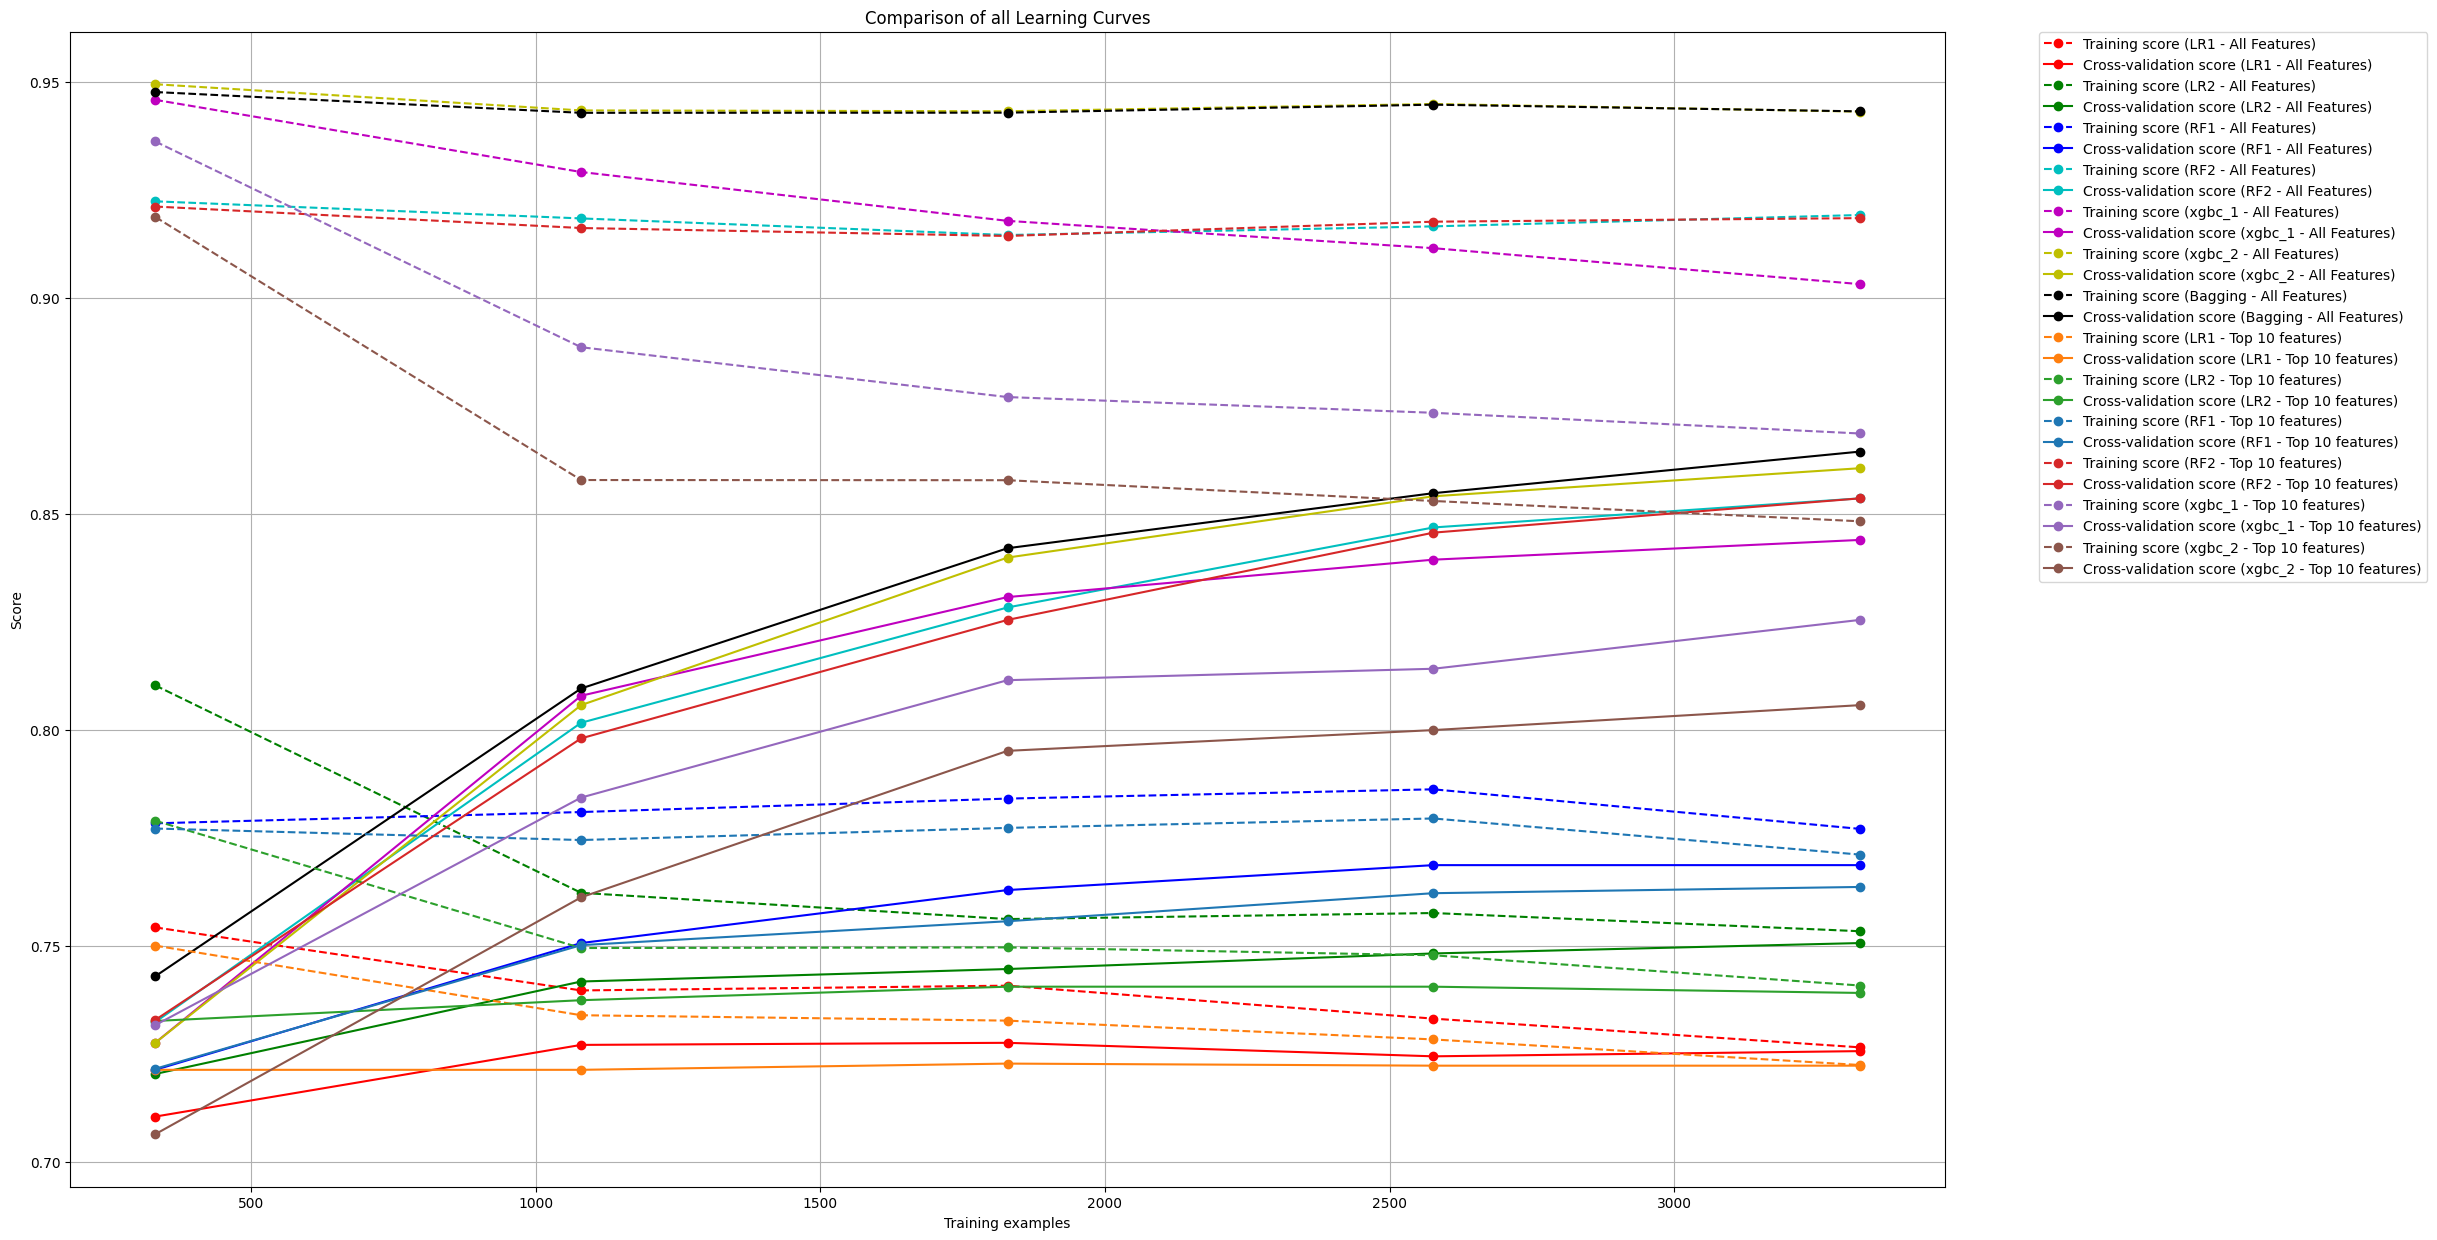

In [20]:
data_to_plot_1 = [
        (results_lr_1['all_features']['model'], "LR1 - All Features", results_lr_1['all_features']['X'], results_lr_1['all_features']['y']),
        (results_lr_2['all_features']['model'], "LR2 - All Features", results_lr_2['all_features']['X'], results_lr_2['all_features']['y']),
        (results_rf1['all_features']['model'], "RF1 - All Features", results_rf1['all_features']['X'], results_rf1['all_features']['y']),
        (results_rf2['all_features']['model'], "RF2 - All Features", results_rf2['all_features']['X'], results_rf2['all_features']['y']),
        (results_xgbc_1['all_features']['model'], "xgbc_1 - All Features", results_xgbc_1['all_features']['X'], results_xgbc_1['all_features']['y']),
        (results_xgbc_2['all_features']['model'], "xgbc_2 - All Features", results_xgbc_2['all_features']['X'], results_xgbc_2['all_features']['y']),
        (results_bagging_2['all_features']['model'], "Bagging - All Features", results_bagging_2['all_features']['X'], results_bagging_2['all_features']['y'])
]

data_to_plot_2 = [
        (results_lr_1['top_10_features']['model'], "LR1 - Top 10 features", results_lr_1['top_10_features']['X'], results_lr_1['top_10_features']['y']),
        (results_lr_2['top_10_features']['model'], "LR2 - Top 10 features", results_lr_2['top_10_features']['X'], results_lr_2['top_10_features']['y']),
        (results_rf1['top_10_features']['model'], "RF1 - Top 10 features", results_rf1['top_10_features']['X'], results_rf1['top_10_features']['y']),
        (results_rf2['top_10_features']['model'], "RF2 - Top 10 features", results_rf2['top_10_features']['X'], results_rf2['top_10_features']['y']),
        (results_xgbc_1['top_10_features']['model'], "xgbc_1 - Top 10 features", results_xgbc_1['top_10_features']['X'], results_xgbc_1['top_10_features']['y']),
        (results_xgbc_2['top_10_features']['model'], "xgbc_2 - Top 10 features", results_xgbc_2['top_10_features']['X'], results_xgbc_2['top_10_features']['y'])
]

clf.plot_learning_curve_comparison(data_sets=data_to_plot_1, title="Comparison of all Learning Curves (all features)"
)
clf.plot_learning_curve_comparison(data_sets=data_to_plot_2, title="Comparison of all Learning Curves (top_10_features)"
)

clf.plot_learning_curve_comparison(data_sets=data_to_plot_1+ data_to_plot_2, title="Comparison of all Learning Curves",figsize=(30,15)
)

# General Model Analysis and Conclusion 📊

Our comprehensive analysis of various classification models has provided clear insights into their performance with both the full feature set and the top 10 most relevant features.

Model	Performance with All Features	Performance with Top 10 Features
Logistic Regression	Good baseline.	Slight performance drop, showing the value of additional features.
Random Forest	Excellent.	Excellent.
XGBoost	Excellent, often matching or slightly surpassing Random Forest.	Excellent, demonstrating robustness with fewer features.
BaggingClassifier	Excellent.	N/A.
Ensemble (VotingClassifier)	Excellent performance, with a minor improvement over the best individual model.	Excellent performance, with a minor improvement over the best individual model.
Best Individual Models

Most Powerful Model: XGBoost emerged as the strongest individual classifier. It is a robust, efficient, and highly predictive model that performs consistently well on both the full and reduced feature sets.

**Most Efficient Model: The Random Forest is a close second. It offers excellent performance with less implementation complexity and great stability.** While XGBoost is marginally better, Random Forest remains a reliable and powerful choice.

The Overall Best Model: The Ensemble

**The absolute best model is the VotingClassifier** . While individual models like XGBoost were very strong, the ensemble's ability to combine their strengths and compensate for their weaknesses led to a more robust and accurate final prediction.

# Save Notebook

In [21]:
os.environ["PATH"] = "/Library/TeX/texbin:" + os.environ["PATH"]
file_manager.save_as_pdf(ipynbname.path())

[NbConvertApp] Converting notebook /Users/lorenzodimaio/Download/SIDS_revelation_project/full_pipeline/classsifier_parameter.ipynb to pdf
[NbConvertApp] Support files will be in /Users/lorenzodimaio/Download/SIDS_revelation_project/full_pipeline/reports/classsifier_parameter(2025-09-01)_files/
[NbConvertApp] Writing 110793 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1823629 bytes to /Users/lorenzodimaio/Download/SIDS_revelation_project/full_pipeline/reports/classsifier_parameter(2025-09-01).pdf
